## Extracting

In [1]:
# We have about 7500 zip files in ../data/raw/temp_fontsforweb/ with fonts in them. We will
# 1. extract every single zip file
# 2. delete any *.css, *.png, *.txt, *.html
# 3. copy the remaining files to a new directory ../data/procesed/fontsforweb
# We will parallelize this process using multiprocessing

import os
import shutil
import zipfile
from concurrent.futures import ThreadPoolExecutor
from tqdm import tqdm

In [2]:
def unzip_delete_copy(zip_file, processed_folder, extensions_to_delete=['.css', '.png', '.txt', '.html']):
    # Get the name of the zip file
    zip_file_name = os.path.basename(zip_file)
    # Create a temporary folder to unzip the zip file
    temp_folder = os.path.join(os.path.dirname(zip_file), zip_file_name.split('.')[0])
    # Unzip the zip file to the temporary folder
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(temp_folder)
    # Get all files in the temporary folder
    files = [os.path.join(temp_folder, file) for file in os.listdir(temp_folder) if os.path.isfile(os.path.join(temp_folder, file))]
    for file in files:
        if os.path.splitext(file)[1] in extensions_to_delete:
            os.remove(file)
        else:
            shutil.copy(file, processed_folder)
    # Delete the temporary folder
    shutil.rmtree(temp_folder)

def zip_files_to_processed_folder(zip_files_path, processed_folder):
    if not os.path.exists(zip_files_path):
        raise ValueError('zip_files_path does not exist')
    if not os.path.exists(processed_folder):
        os.makedirs(processed_folder)
    # Get all zip files in the zip_files_path
    zip_files = [os.path.join(zip_files_path, file) for file in os.listdir(zip_files_path) if file.endswith('.zip')]
    # Parallelize the process
    with ThreadPoolExecutor(max_workers=4) as executor:
        executor.map(unzip_delete_copy, zip_files, [processed_folder]*len(zip_files))
    # # Without pool for testing
    # for zip_file in tqdm(zip_files[:10]):
    #     unzip_delete_copy(zip_file, processed_folder)

In [3]:
zip_files_to_processed_folder('../data/raw/temp_fontsforweb/', '../data/processed/fontsforweb/')

## First Analysis of *.woff files

In [4]:
# Let's see if we can handle font files with *.woff extension
from fontTools.ttLib import TTFont
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil

In [19]:
font_folder = '../data/processed/fontsforweb/'
font_files = [os.path.join(font_folder, file) for file in os.listdir(font_folder) if file.endswith('.woff')]
font_file = font_files[0]
font = TTFont(font_file)

TypeError: 'Axes' object is not subscriptable

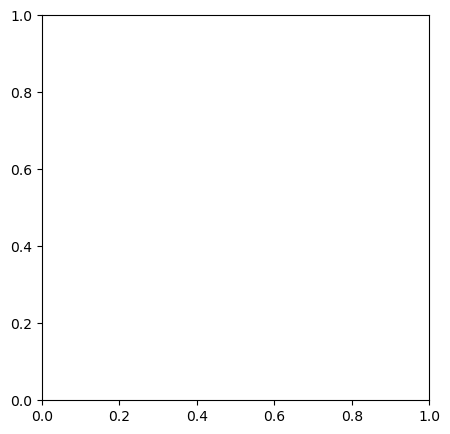

In [10]:
import sys
sys.path.append('../')

from src.data import datarenderer

# datarenderer.plot_glyphs([font_file], chars='AÄ', figsize=(5,5))

## Convert *.woff to *.ttf

In [15]:
# We can open the font file *.woff with fontTools but we can not render it using pillow
# We need to convert it to *.ttf first
# We will use fonttools to convert *.woff to *.ttf

def convert_woff_to_ttf(woff_file, ttf_file):
    font = TTFont(woff_file)
    font.flavor = None
    font.save(ttf_file)

convert_woff_to_ttf(font_file, font_file.replace('.woff', '.ttf'))

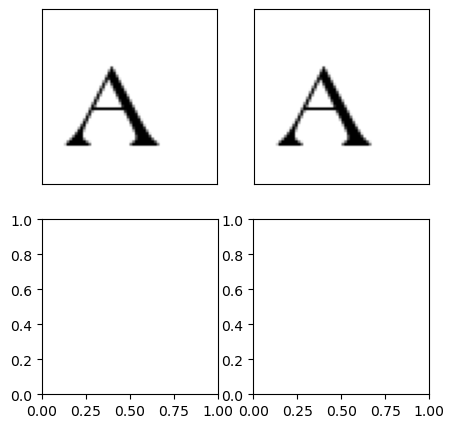

In [18]:
datarenderer.plot_glyphs([font_file.replace('.woff', '.ttf')]*2, chars='A', figsize=(5,5))

In [20]:
# This works! Now we do the same for all the font files in the folder
def replace_woff_with_ttf(font_folder):
    font_files = [os.path.join(font_folder, file) for file in os.listdir(font_folder) if file.endswith('.woff')]
    for font_file in font_files:
        convert_woff_to_ttf(font_file, font_file.replace('.woff', '.ttf'))
        os.remove(font_file)

with ThreadPoolExecutor(max_workers=4) as executor:
    executor.map(replace_woff_with_ttf, [font_folder]*len(font_files))

'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very low; regarding as unix timestamp
'created' timestamp seems very low; regarding as unix timestamp
'modified' timestamp seems very l

## Second Analysis of font files

In [25]:
font_folder = '../data/processed/fontsforweb/'
font_files = [os.path.join(font_folder, file) for file in os.listdir(font_folder) if file.endswith('.ttf')]
font_file = font_files[0]

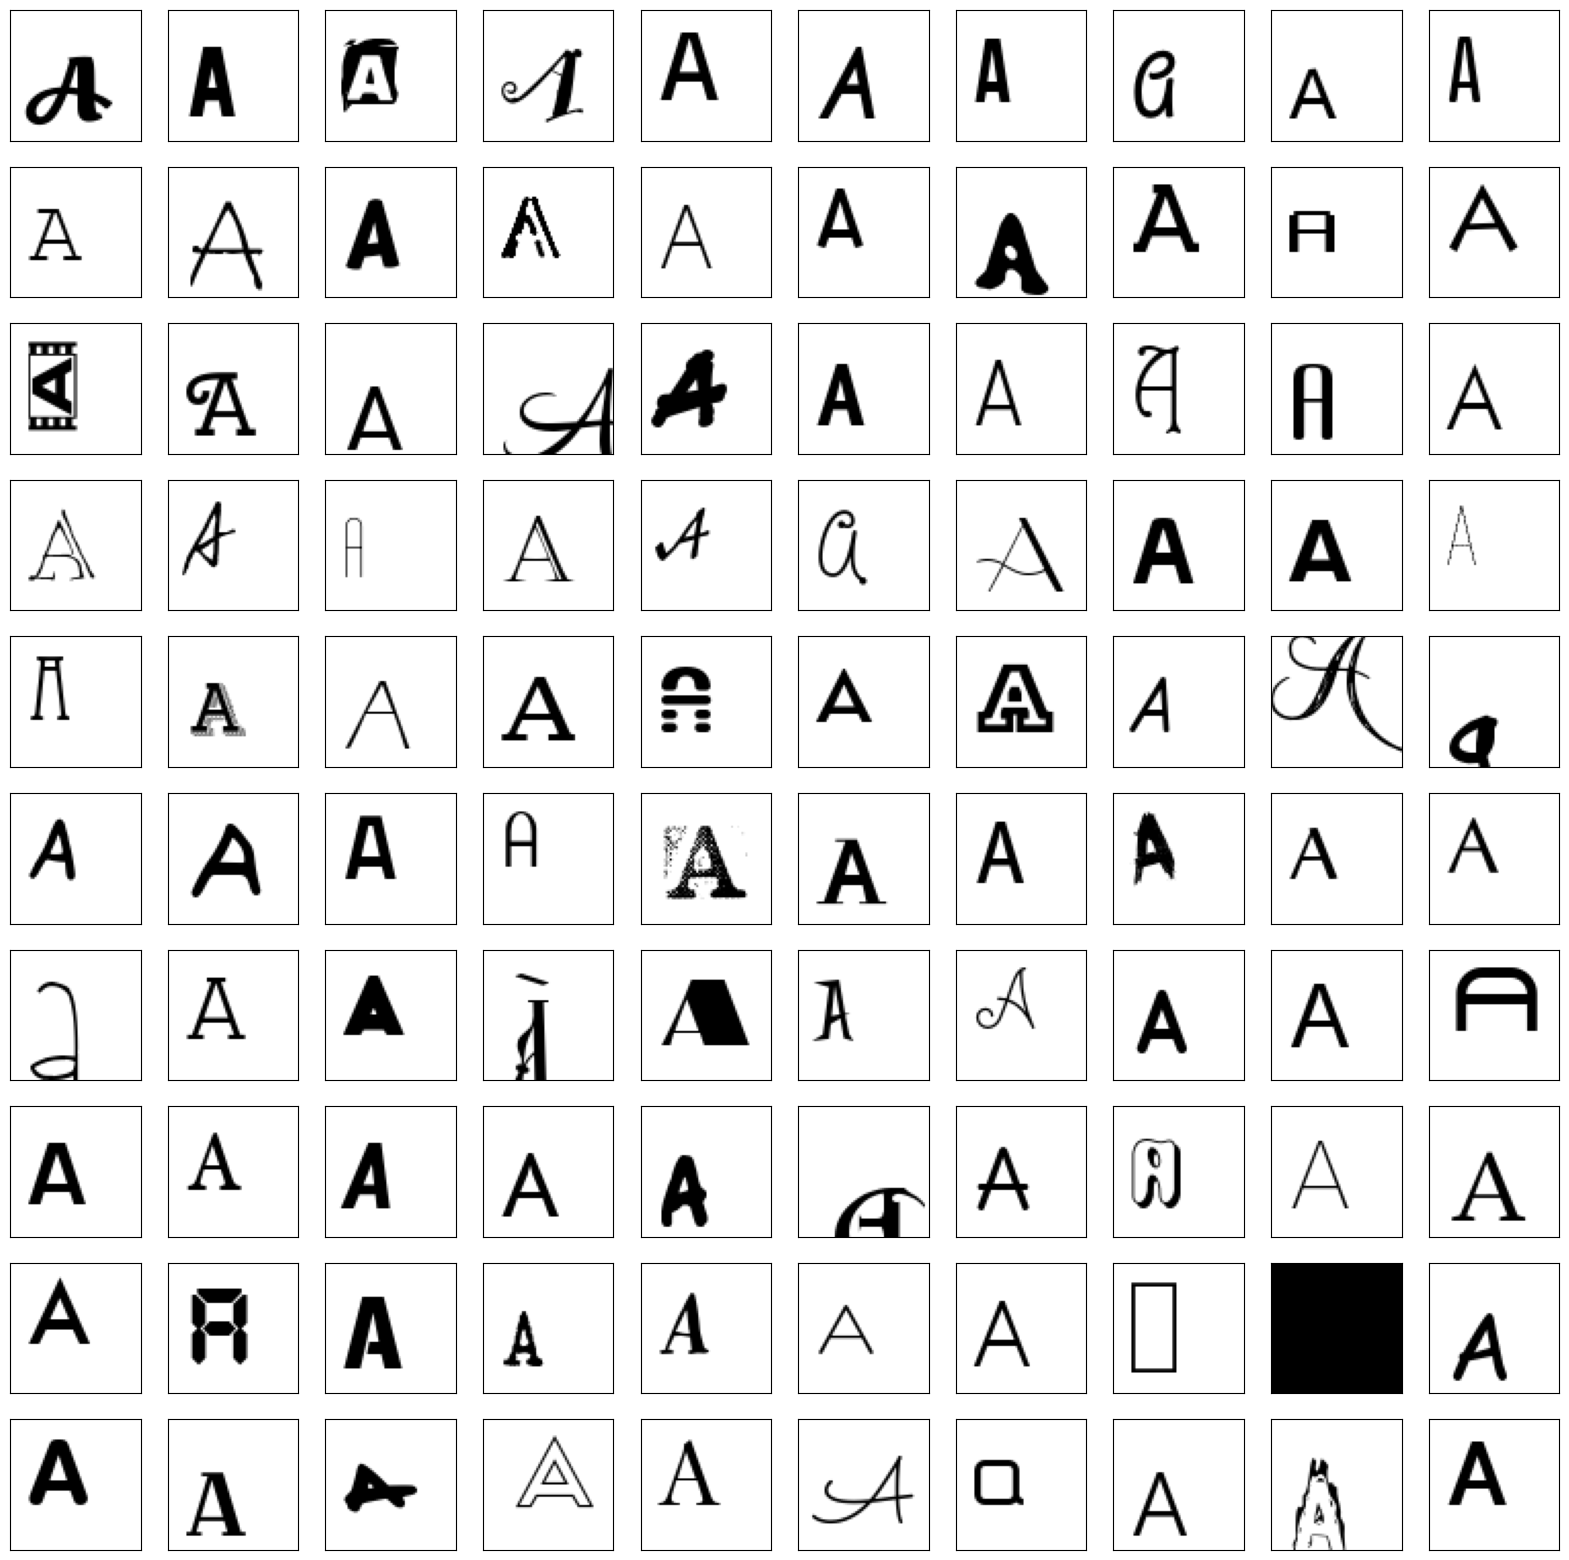

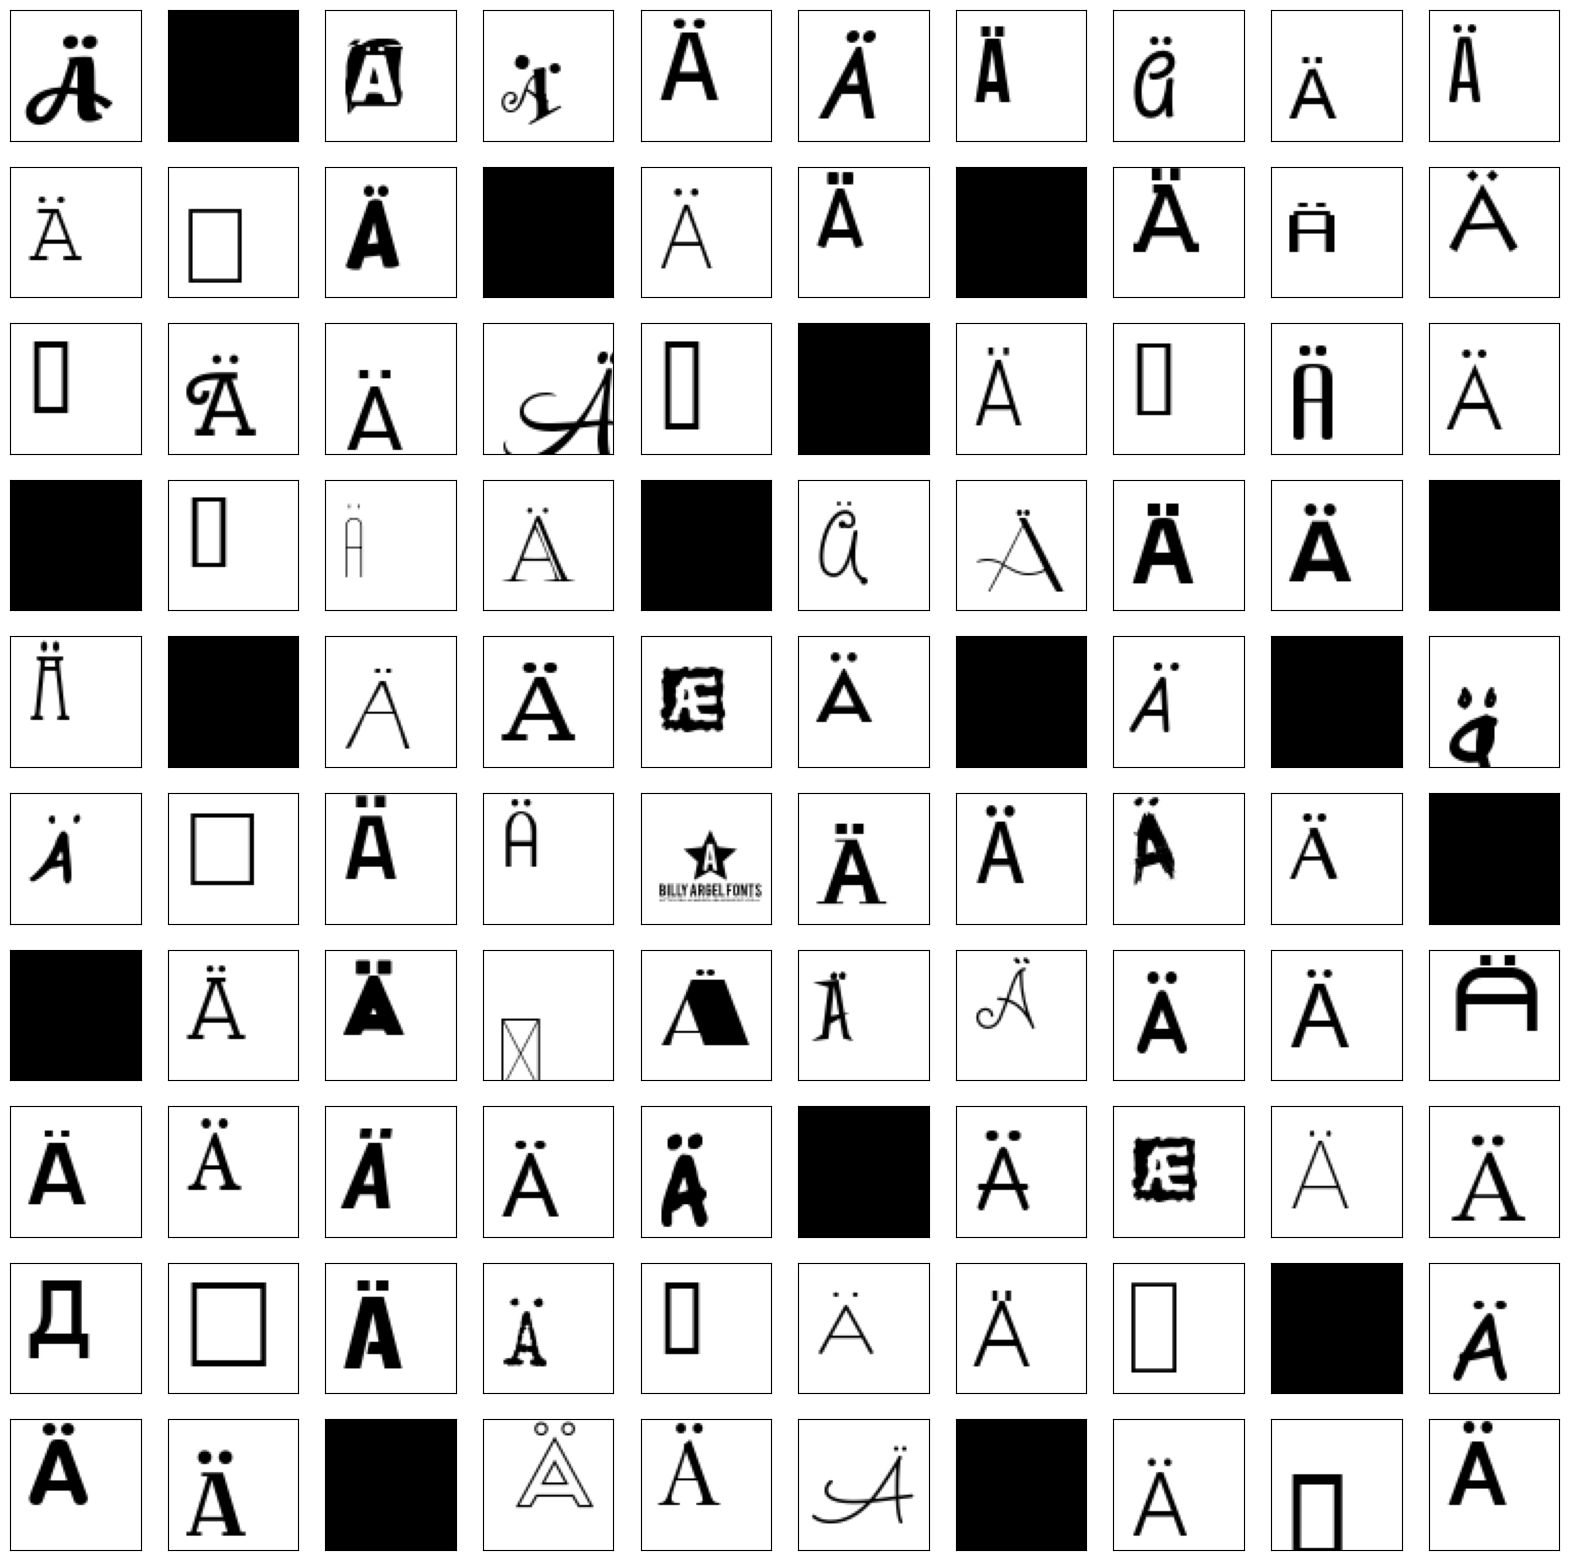

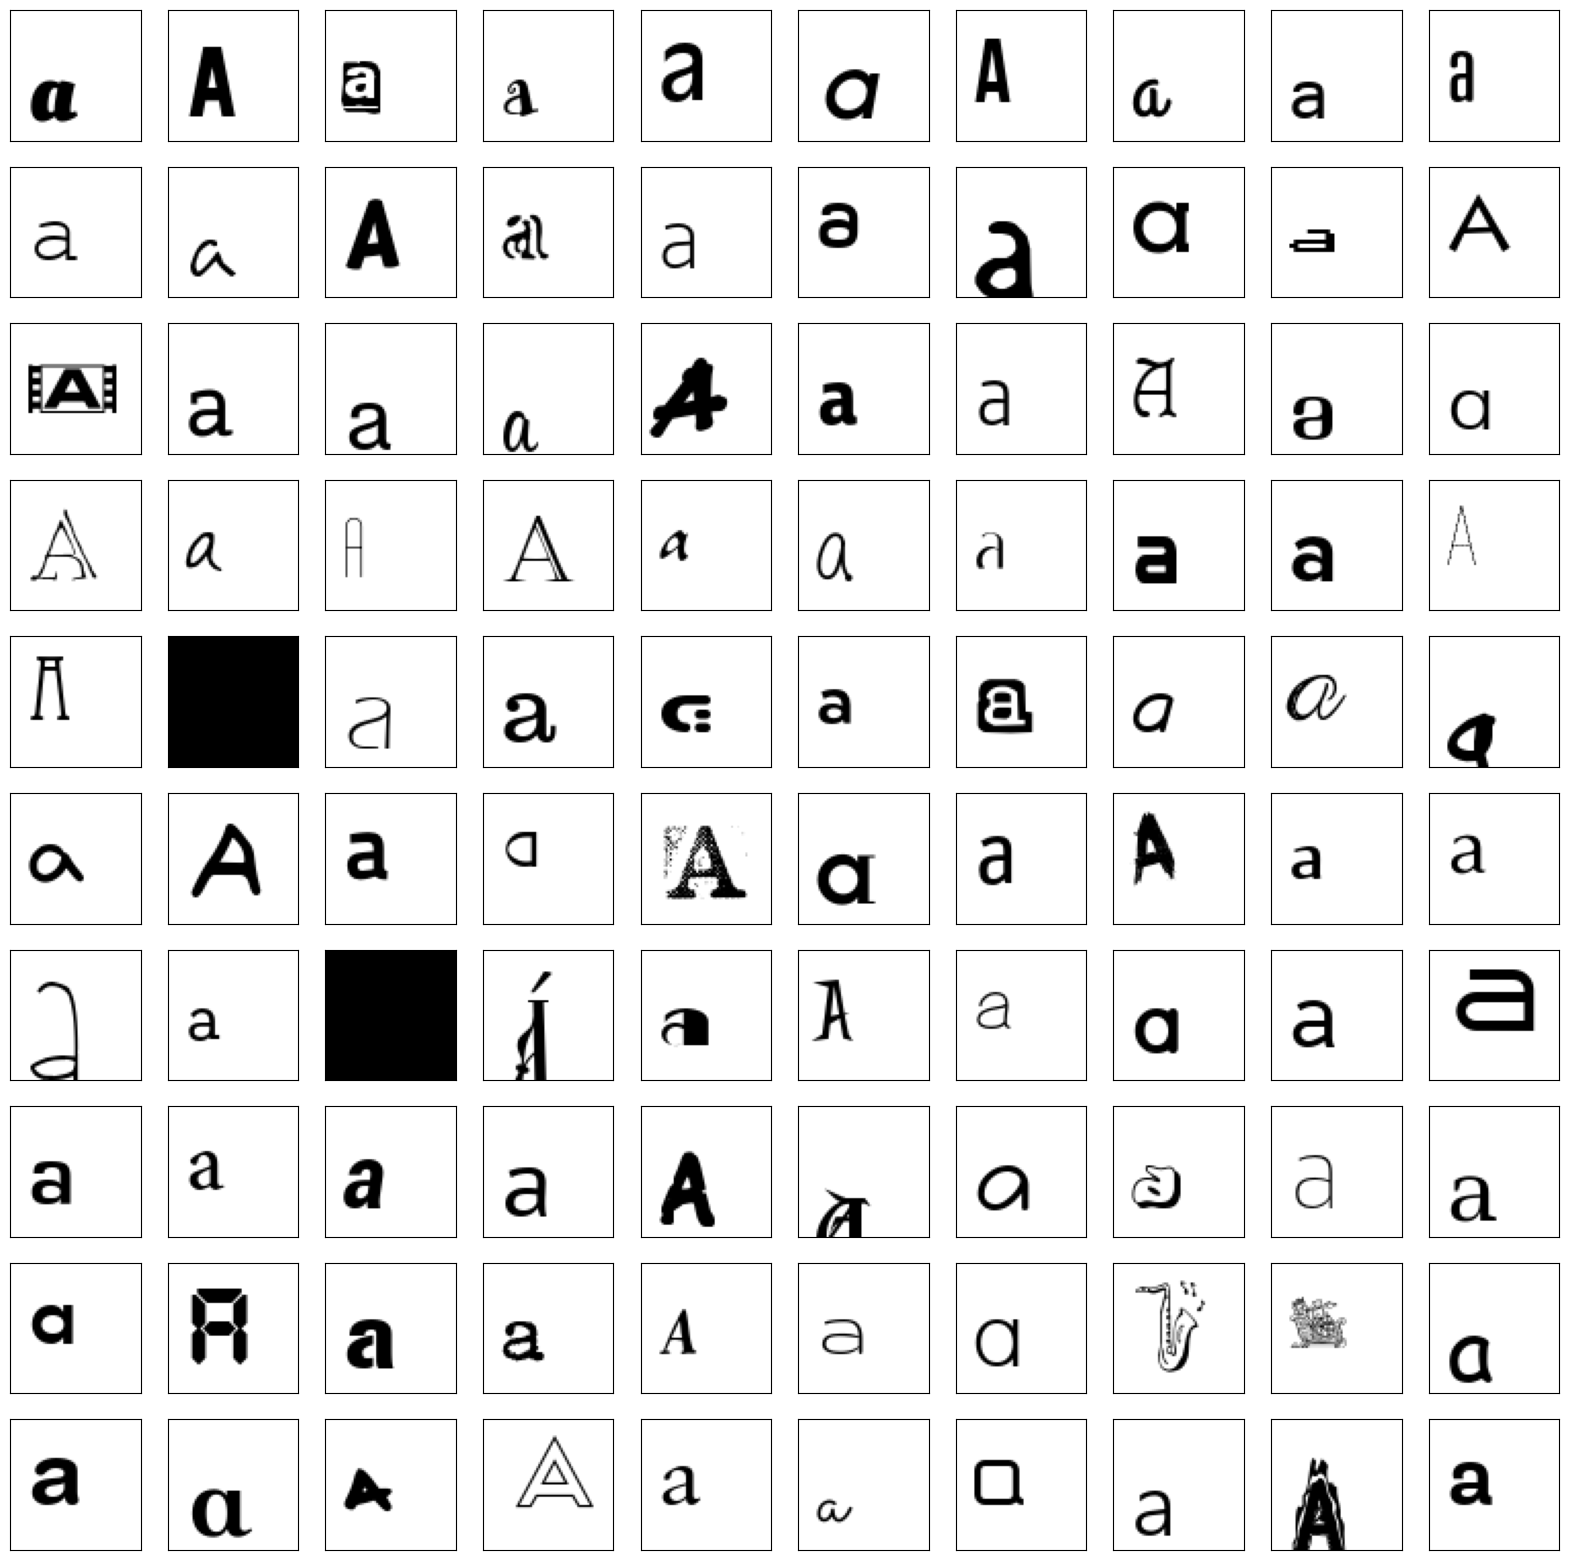

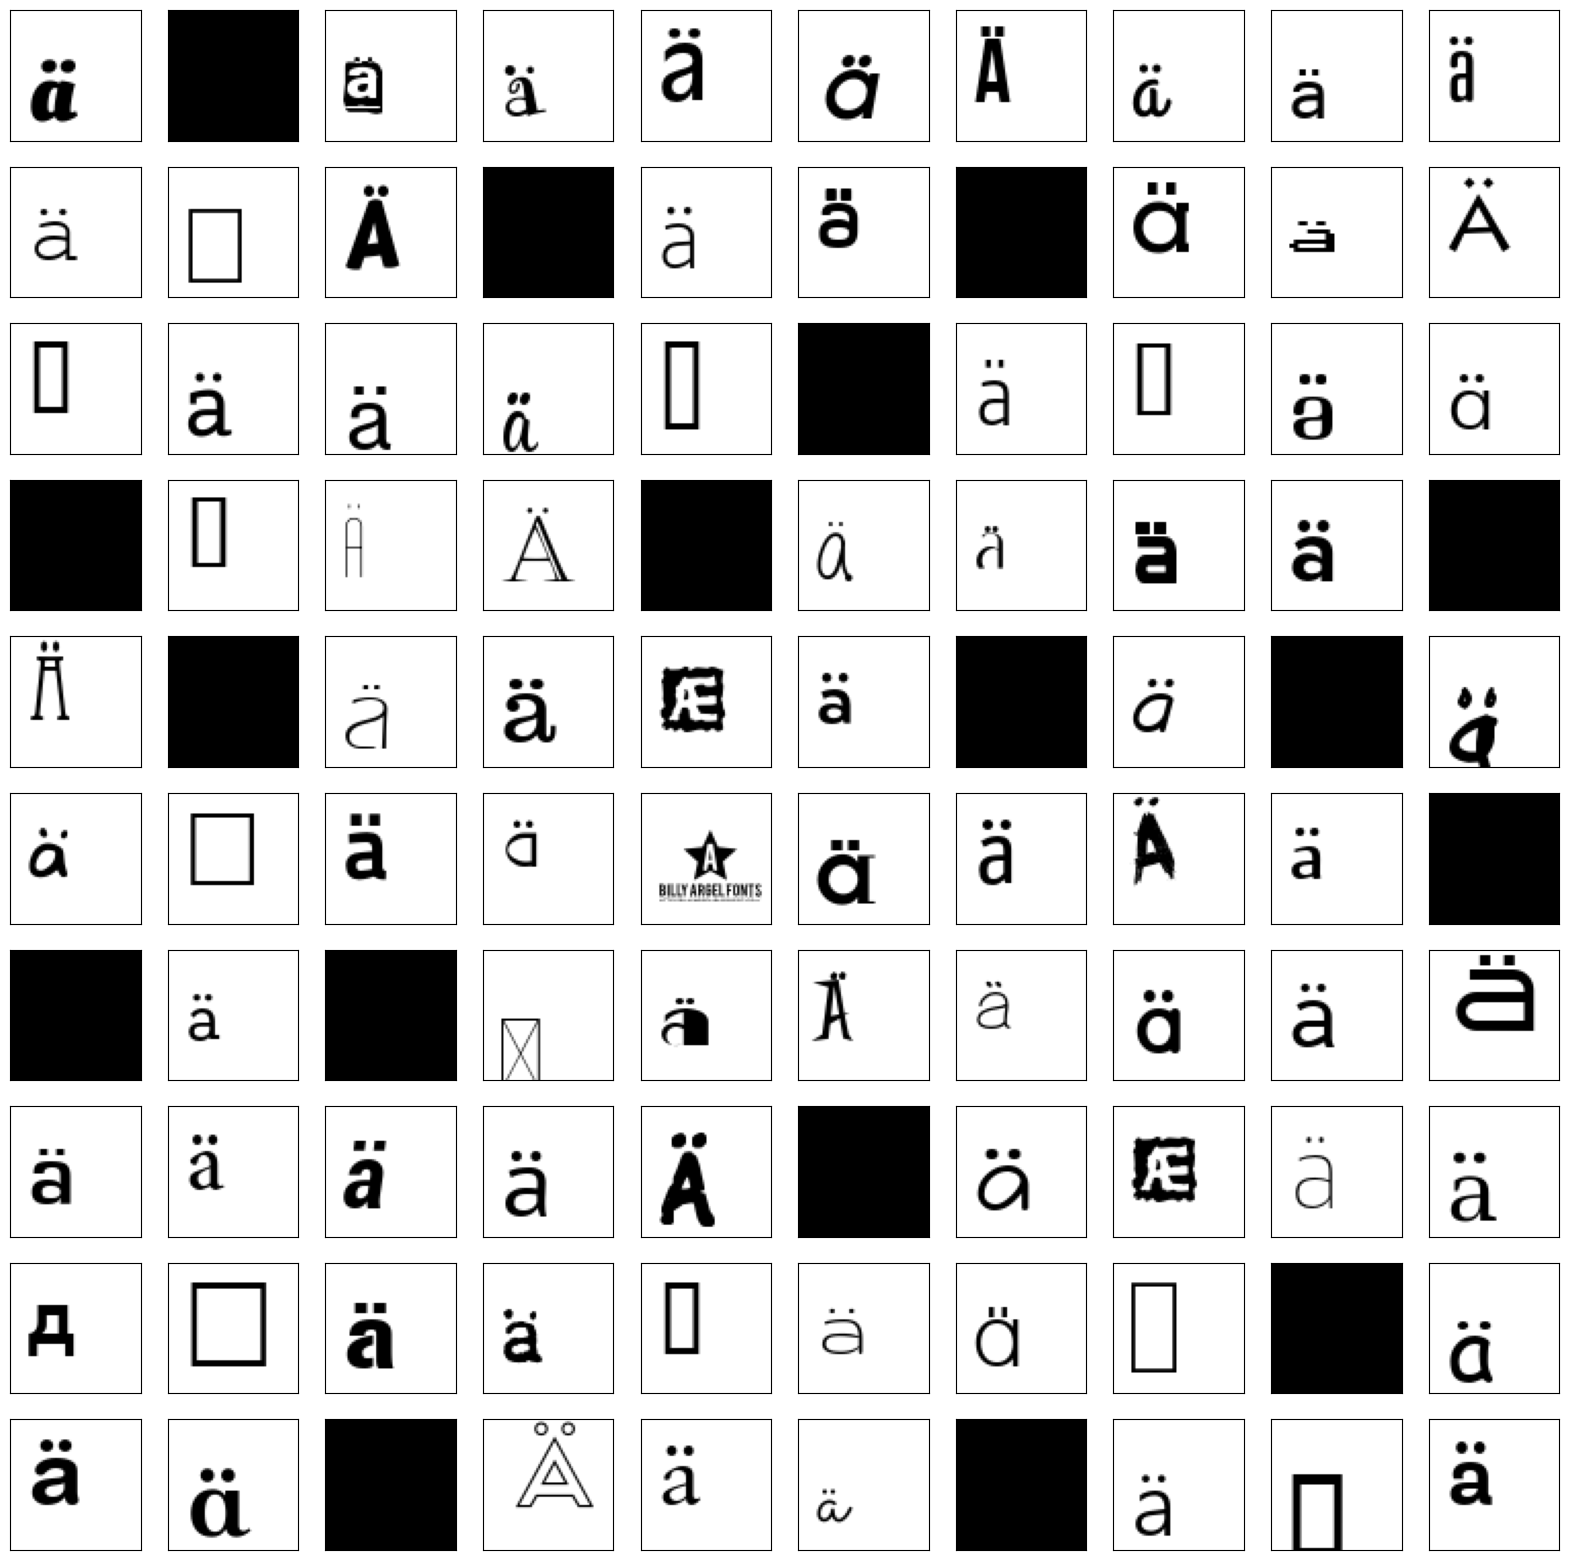

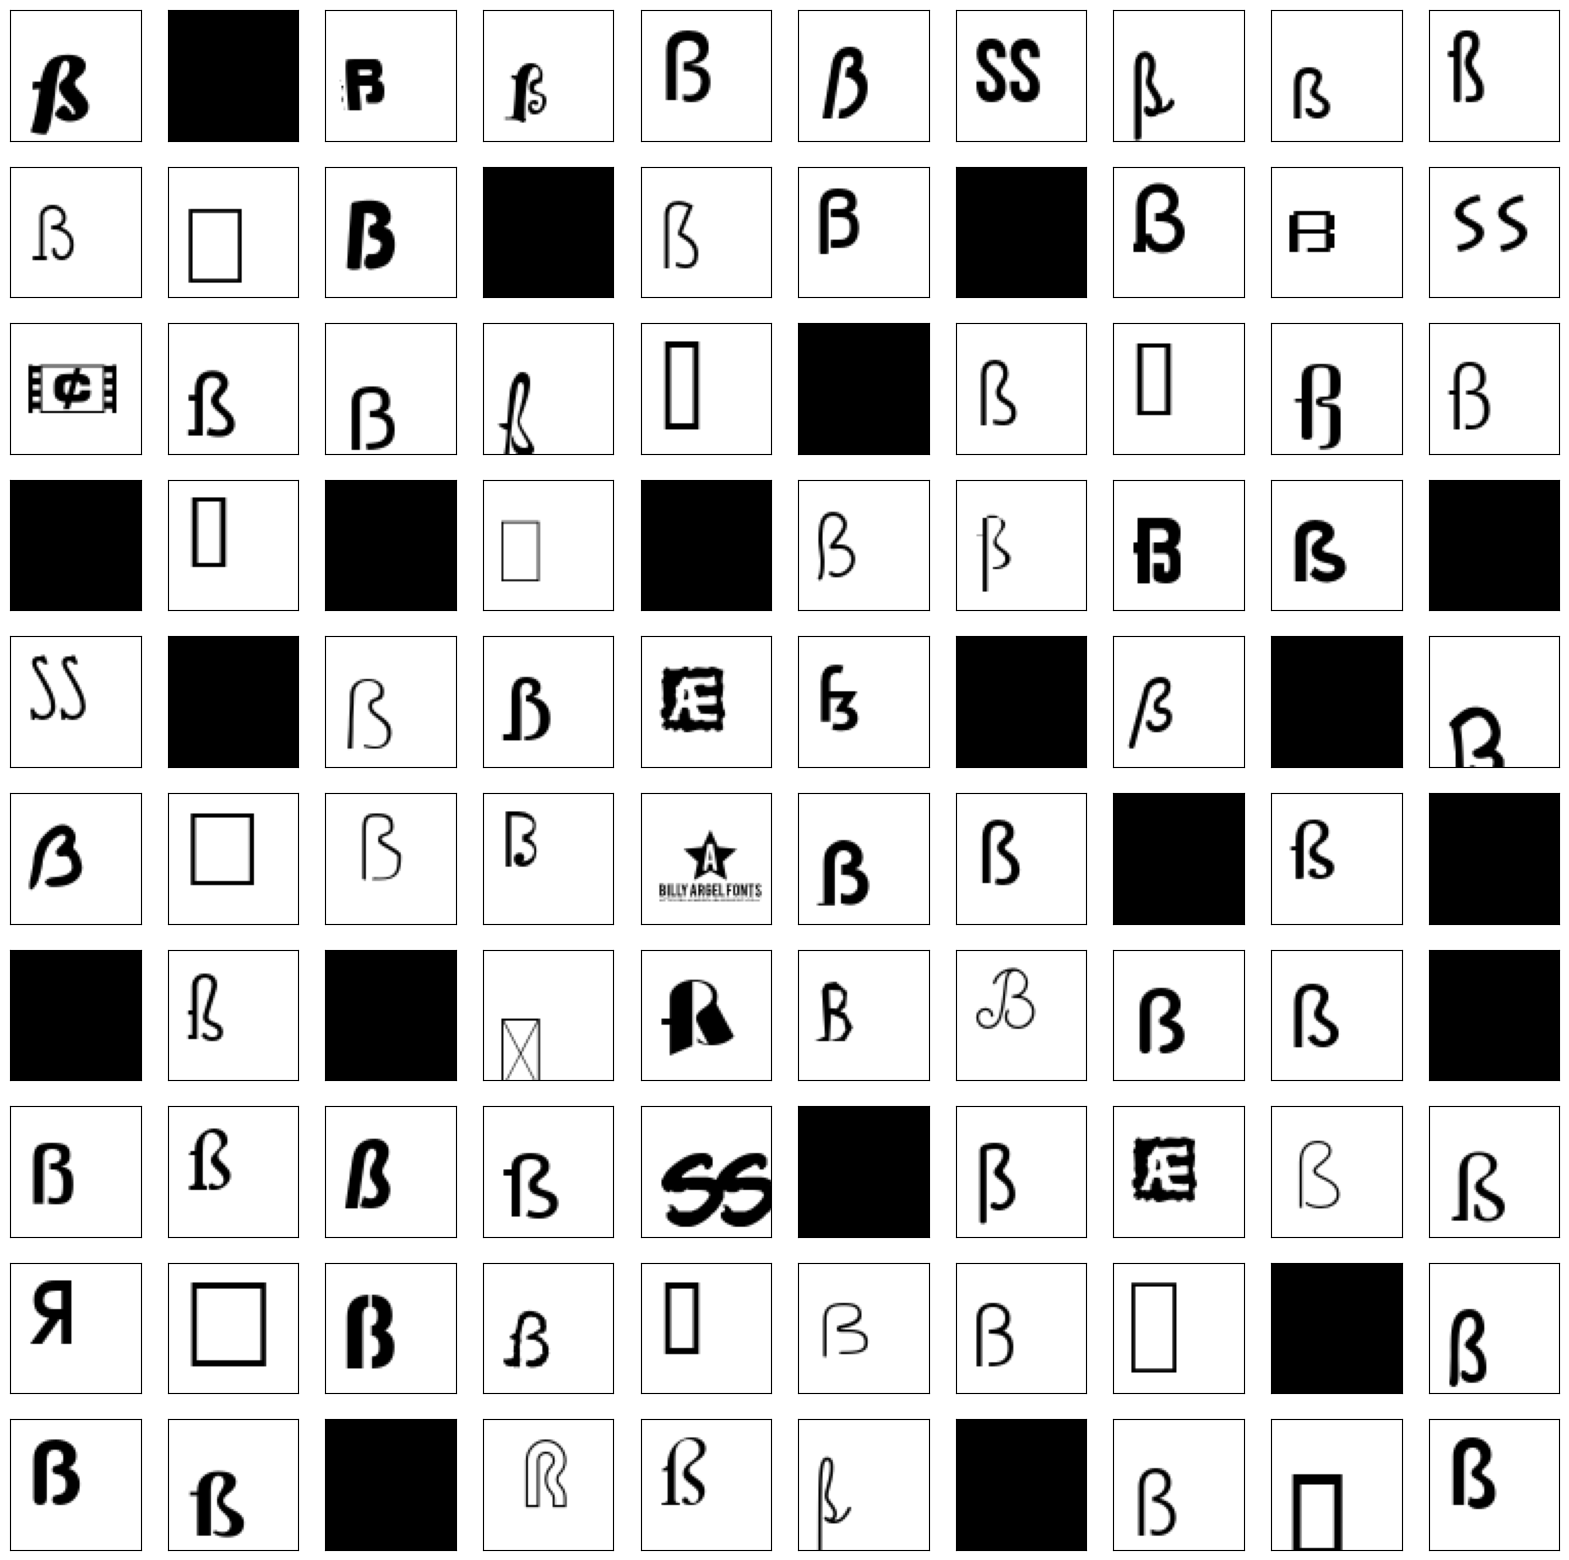

In [28]:
num_fonts = 10**2
# sampling num_fonts fonts from the list of font file names
font_file_selection = np.random.choice(font_files, size=num_fonts, replace=False)

datarenderer.plot_glyphs(font_file_selection, 64, "AÄaäß")